# Ejercicio 10

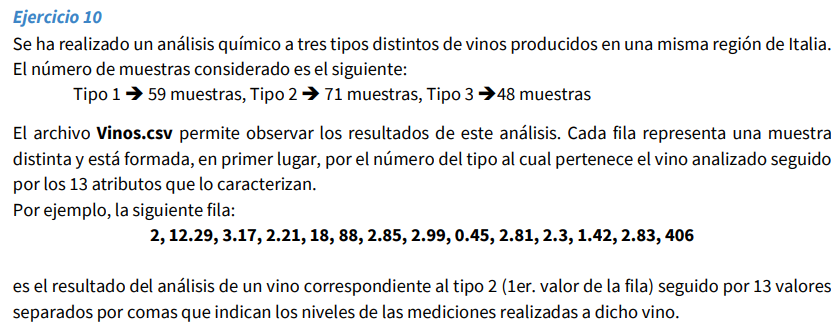

- tipo 1
- tipo 2
- tipo 3
- La primer columna indica el tipo de vino al que pertence

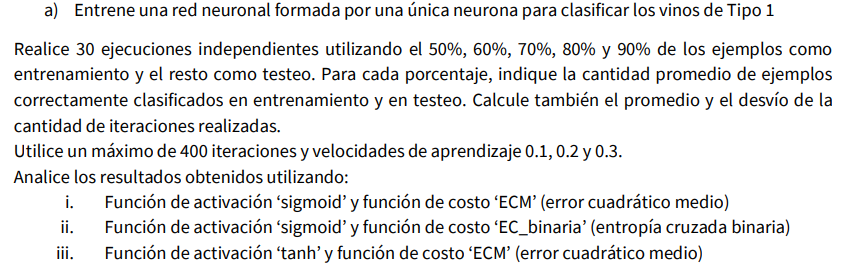

# Importe de librerias y lectura de datos

In [1]:
ColabNotebook = 'google.colab' in str(get_ipython())

if ColabNotebook:
    # monta G-drive en entorno COLAB
    from google.colab import drive
    drive.mount('/content/drive/')

    # carpeta donde se encuentran archivos .py auxiliares
    FUENTES_DIR = '/content/drive/MyDrive/Colab Notebooks/FUENTES/'
    DATOS_DIR = '/content/drive/MyDrive/Colab Notebooks/DATOS/'      # carpeta donde se encuentran los datasets
else:
    # configuración para notebook con instalación LOCAL
    FUENTES_DIR = '../Fuentes'         # carpeta donde se encuentran archivos .py auxiliares
    DATOS_DIR   = '../Datos/' # carpeta donde se encuentran los datasets

# agrega ruta de busqueda donde tenemos archivos .py
import sys
sys.path.append(FUENTES_DIR)

In [2]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from ClassNeuronaGral import NeuronaGradiente

In [3]:
import pandas as pd      # para trabajar con archivos de datos csv, excel, etc: https://pandas.pydata.org/docs/getting_started/tutorials.html
import chardet           # para detectar la codificación de texto en archivos
import numpy as np

from sklearn import preprocessing
from matplotlib import pyplot as plt
import seaborn as sns

# importa neurona lineal de Laura en la carpeta Colab definida con FUENTES_DIR
from ClassNeuronaLineal import NeuronaLineal

nombre_archivo = DATOS_DIR + 'Vinos.csv' # archivo de hojas

#-- detectando la codificación de caracteres usada ----
with open(nombre_archivo, 'rb') as f:
    result = chardet.detect(f.read())  # or readline if the file is large

# recupera el archivo en un objeto dataframe de pandas utilizando la codificación detectada
df = pd.read_csv(nombre_archivo, sep=';')

df

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


# Data Wrangling

In [4]:
df.isnull().sum()

Class                   0
Alcohol                 0
Malic acid              0
Ash                     0
Alcalinity of ash       0
Magnesium               0
Total phenols           0
Flavanoids              0
Nonflavanoid phenols    0
Proanthocyanins         0
Color intensity         0
Hue                     0
OD280/OD315             0
Proline                 0
dtype: int64

In [5]:
df['Class'].unique()

array([1, 2, 3], dtype=int64)

In [6]:
df_one_hot = pd.get_dummies(df['Class'], prefix='Class')
df_one_hot.head()

,Class_1,Class_2,Class_3
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [7]:
df = pd.concat([df, df_one_hot], axis=1)
df.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315,Proline,Class_1,Class_2,Class_3
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1,0,0
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1,0,0
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1,0,0
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1,0,0
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1,0,0


In [8]:
df = df.drop('Class', axis=1)
df.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315,Proline,Class_1,Class_2,Class_3
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1,0,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1,0,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1,0,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1,0,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1,0,0


# Division en X e Y

In [16]:
Y = df['Class_1']
X = df.drop(columns=['Class_1'])

In [17]:
X = np.array(X)
Y = np.array(Y)


In [18]:
Y = Y*2.0 - 1
Y

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1.])

### Normalizacion de datos

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Entrenamiento del modelo

In [20]:
CANT_EJECUCIONES = 30
CANT_PORCENTAJES = 5
porcentajes_entrenamiento = [0.5 , 0.6 , 0.7, 0.8, 0.9]
tasa = 0.3
resultados = []

for i in range(CANT_PORCENTAJES): #por cada porcentaje de entrenamiento realizo 30 ejecuciones independientes
    #inicializp donde voy a guardar las nmetricas
    ejemplos_correctos_train = []
    ejemplos_correctos_test = []
    cant_iteraciones = []

    #POR CADA PORCENTAJE
    for p in range (CANT_EJECUCIONES):
        #divido en entrenamiento y testeo
        X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=porcentajes_entrenamiento[i], random_state=None)
        #modelo
        neurona = NeuronaGradiente(alpha=tasa, n_iter=400, FUN='tanh', COSTO='ECM', draw=0)
        #entrenamiento
        neurona.fit(X_train, y_train)
        #predicciones
        y_pred_train = neurona.predict(X_train)
        y_pred_test = neurona.predict(X_test)
        #calculo los ejemplos que estan correctamenre clasificados
        correct_train = np.sum(y_pred_train == y_train)
        correct_test = np.sum(y_pred_test == y_test)
        #guardo los resultados de las predicciones correctas
        ejemplos_correctos_train.append(correct_train)
        ejemplos_correctos_test.append(correct_test)
        #cuento la cantidad de iteraciones
        cant_iteraciones.append(len(neurona.errors_))
    
    prom_train = np.mean(ejemplos_correctos_train)
    prom_test = np.mean(ejemplos_correctos_test)
    prom_iter = np.mean(cant_iteraciones)
    desv_iter = np.std(cant_iteraciones)

    #por cada porcentaje me guardo los resultados
    resultados.append({
        'Porcentaje': porcentajes_entrenamiento[i],
        'Tasa' : tasa,
        'Promedio Correctos Train': prom_train,
        'Promedio Correctos Test': prom_test,
        'Promedio Iteraciones': prom_iter,
        'Desviación Iteraciones': desv_iter

    })


for r in resultados:
    print(f"Porcentaje: {r['Porcentaje']}, Tasa: {r['Tasa']}")
    print(f"  Promedio Correctos Train: {r['Promedio Correctos Train']}")
    print(f"  Promedio Correctos Test: {r['Promedio Correctos Test']}")
    print(f"  Promedio Iteraciones: {r['Promedio Iteraciones']} +/- {r['Desviación Iteraciones']}")
    print()
    

Porcentaje: 0.5, Tasa: 0.3
  Promedio Correctos Train: 89.0
  Promedio Correctos Test: 88.73333333333333
  Promedio Iteraciones: 361.23333333333335 +/- 68.95538815462905

Porcentaje: 0.6, Tasa: 0.3
  Promedio Correctos Train: 106.0
  Promedio Correctos Test: 71.9
  Promedio Iteraciones: 384.7 +/- 43.212768174850055

Porcentaje: 0.7, Tasa: 0.3
  Promedio Correctos Train: 124.0
  Promedio Correctos Test: 53.9
  Promedio Iteraciones: 391.56666666666666 +/- 25.502527107894405

Porcentaje: 0.8, Tasa: 0.3
  Promedio Correctos Train: 142.0
  Promedio Correctos Test: 36.0
  Promedio Iteraciones: 383.3333333333333 +/- 40.74909678617293

Porcentaje: 0.9, Tasa: 0.3
  Promedio Correctos Train: 160.0
  Promedio Correctos Test: 18.0
  Promedio Iteraciones: 374.76666666666665 +/- 53.95410601201317



# Resultados

### 1. Con tasa de de aprendizaje de 0.1


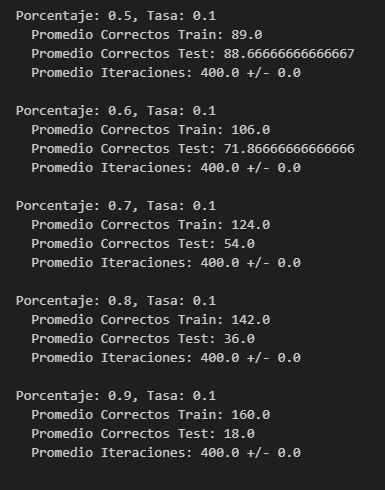

### 2. Con tasa de aprendizaje de 0.2

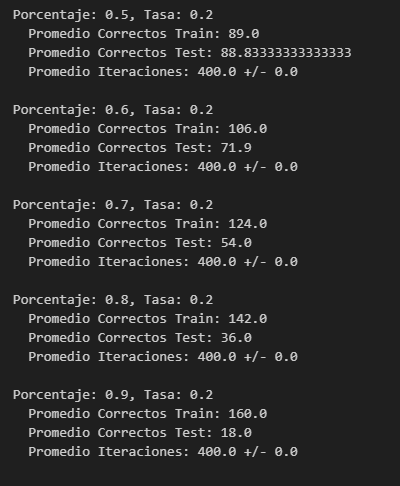

### 3. Con tasa de aprendizaje de 0.3

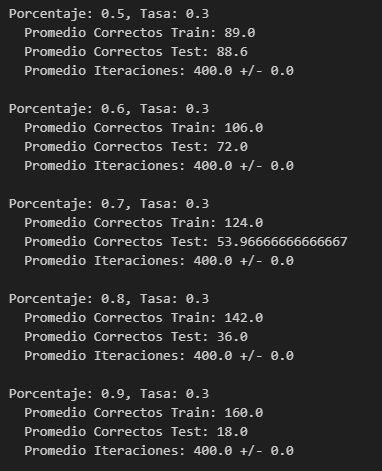